<a href="https://colab.research.google.com/github/oneicar/ProyectoClase15/blob/main/Taller_1_Ejercicio_1_Resuelto_Deep_Learning_Oneicar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from pandas import DataFrame
from keras.layers import Dropout

In [86]:
import pandas as pd
url = ("https://raw.githubusercontent.com/oneicar/deep-learning/main/spiral.csv?token=GHSAT0AAAAAABX4GMMYMPUPIS33Z5V56S2MYYLWH7Q")
df =  pd.read_csv(url)
print =(df.head (10))

In [88]:
X = pd.concat((df["X1"], df["X2"]), axis = 1)
X.head()

,X1,X2
0,13.31596,-5.47317
1,16.70656,1.26700
2,7.18348,7.29934
3,-7.94940,-14.77444
4,-5.96108,-18.68620


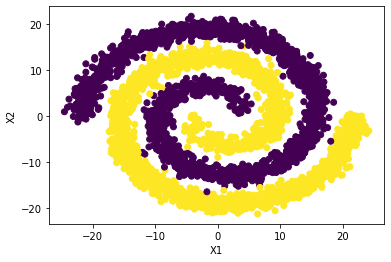

In [89]:
plt.scatter(df["X1"], df["X2"], c = df["y"])
plt.xlabel("X1")
plt.ylabel("X2");

In [90]:
x = df["X1"].shape

In [91]:
x = df["X2"].shape

**Conjunto de train y test:**

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
X.shape

(4000, 2)

In [99]:
X_train.shape

(3200, 2)

**Escalado de variables:**

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [102]:
X_train[0:5]

array([[-1.29928547,  1.36472678],
       [ 0.10545385,  0.47739776],
       [-0.56765229, -1.31247333],
       [-0.88039349,  0.84193573],
       [-0.70311773, -1.48400951]])

In [103]:
X_test[0:5]

array([[ 0.60551563,  1.3573064 ],
       [-1.37588014, -0.29106387],
       [ 0.66102038,  1.40502124],
       [-1.14084816, -1.05010844],
       [-0.86979353,  1.58768842]])

**Red Neuronal Artificial (RNA)**

In [104]:
from keras.models import Sequential
from keras.layers import Dense

In [105]:
# define model
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



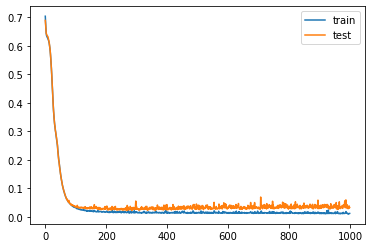

In [106]:
# fit model
history = model.fit(X_train,y_train, validation_data=(X_test,  y_test), epochs=1000, verbose=0)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**Evaluación del desempeño:**

In [107]:
model.evaluate(X_test, y_test, verbose = 0)

[0.03261743485927582, 0.9912499785423279]

In [108]:
import matplotlib.pyplot as plt

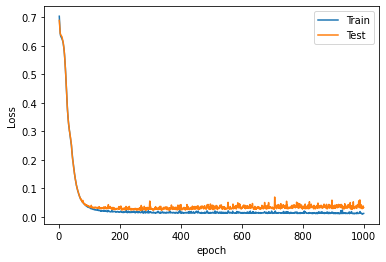

In [109]:
plt.plot(range(1, len(history.epoch) + 1), history.history["loss"], label="Train")
plt.plot(range(1, len(history.epoch) + 1), history.history["val_loss"], label="Test")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend();

In [110]:
y_pred = model.predict(X_test, verbose = 0)
y_pred[0:5]

array([[7.445971e-06],
       [1.000000e+00],
       [1.299907e-06],
       [1.000000e+00],
       [8.937973e-07]], dtype=float32)

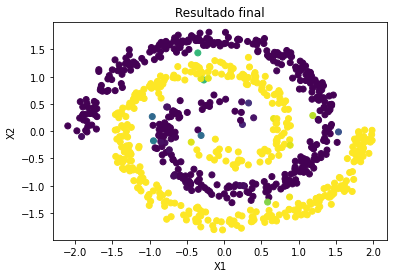

In [111]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Resultado final");

In [ ]:
from matplotlib.colors import ListedColormap

X_Set, y_Set = X, y
X1, X2 = np.meshgrid(
    np.arange(start=X_Set[:, 0].min() - 1, stop=X_Set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_Set[:, 1].min() - 1, stop=X_Set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    X1,
    X2,
    model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("skyblue", "#F3B3A9")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_Set)):
    plt.scatter(
        X_Set[y_Set == j, 0],
        X_Set[y_Set == j, 1],
        c=ListedColormap(("#195E7A", "#BA1818"))(i),
        label=j,
    )
plt.title("Red Neuronal Artificial")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

In [129]:
y_pred = np.round(model.predict(X_test, verbose = 0))
y_pred[0:5]

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3213812450>,
      dtype=object)

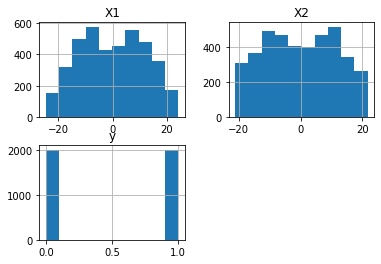

In [132]:
df.hist()